<a href="https://colab.research.google.com/github/indianaeronaut/ai_ml/blob/main/03KK_Project_Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Ensemble Techniques
# By: Krishna Kant Kaushal
# Python version used: Python 3.7.3

🥏Data Description:

    The data is related with direct marketing campaigns of a Portuguese banking institution. 
    The marketing campaigns were based on phone calls. Often, more than one contact to the same 
    client was required, in order to access if the product (bank term deposit) would be subscribed 
    ('yes') or not ('no') subscribed.

🥏Domain:

    Banking

🥏Context:

    Leveraging customer information is paramount for most businesses. In the case of a bank, 
    attributes of customers like the ones mentioned below can be crucial in strategizing a marketing 
    campaign when launching a new product.

🥏Attribute Information:

    1. age​ (numeric)
    2. job​ : type of job (categorical:
    'admin.','blue-collar','entrepreneur','housemaid','manage ment','retired',
    'self-employed','services','student','technicia n','unemployed','unknown')
    3. marital​ : marital status (categorical: 'divorced','married','single','unknown'; 
    note: 'divorced' means divorced or widowed)
    4. education​ (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate',
    'profes sional.course','university.degree','unknown')
    5. default​: has credit in default? (categorical: 'no','yes','unknown')
    6. balance​: average yearly balance, in euros (numeric)
    7. housing​: has housing loan? (categorical:'no','yes','unknown')
    8. loan​: has personal loan? (categorical: 'no','yes','unknown')
    9. contact​: contact communication type (categorical:'cellular','telephone')
    10. day​: last contact day of the month (numeric 1 -31)
    11. month​: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    12. duration​: last contact duration, in seconds (numeric). 
        Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
        Yet, the duration is not known before a call is performed. Also, after the end of the call y is 
        obviously known. Thus, this input should only be included for benchmark purposes and should be 
        discarded if the intention is to have a realistic predictive model.
    13. campaign​: number of contacts performed during this campaign and for this client (numeric, 
    includes last contact)
    14. pdays​: number of days that passed by after the client was last contacted from a previous 
    campaign (numeric; 999 means client was not previously contacted)
    15.previous​: number of contacts performed before this campaign and for this client (numeric)
    16. poutcome​: outcome of the previous marketing campaign (categorical: 'failure','nonexistent',
    'success')
    17.target​: has the client subscribed a term deposit? (binary:"yes","no")

🥏Learning Outcomes:
    
    ● Exploratory Data Analysis
    ● Preparing the data to train a model
    ● Training and making predictions using an Ensemble Model
    ● Tuning an Ensemble model

🥏Objective:
    
    The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

🥏Steps and tasks:

    1. Import the necessary libraries
    2. Read the data as a data frame
    3. Perform basic EDA which should include the following and print out your insights at every step.
        a. Shape of the data
        b. Data type of each attribute
        c. Checking the presence of missing values 
        d. 5 point summary of numerical attributes 
        e. Checking the presence of outliers
    4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc
    5. Train a few standard classification algorithms, note and comment on their performances along 
    different metrics.
    6. Build the ensemble models and compare the results with the base models. Note: Random forest can be
    used only with Decision trees.
    7. Compare performances of all the models

# 1. Import the necessary libraries

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# To enable plotting graph in jupyter notebook
%matplotlib inline

In [ ]:
# for arrays and matrices
import numpy as np

# for importing data and data analysis
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting data in train and test sets
from sklearn.model_selection import train_test_split

from sklearn import tree

# For calculating accuracy measures and confusion matrix
from sklearn import metrics

from os import system
from IPython.display import Image  

# For Decision Tree model building
from sklearn.tree import DecisionTreeClassifier

# For Bagging Classifier model building
from sklearn.ensemble import BaggingClassifier

# For AdaBoosting model building
from sklearn.ensemble import AdaBoostClassifier

# For DGradient Boosting model building
from sklearn.ensemble import GradientBoostingClassifier

# For Random Forest model building
from sklearn.ensemble import RandomForestClassifier


#====
# for Logistic Regression
from sklearn.linear_model import LogisticRegression

# for Naive Bayse
from sklearn.naive_bayes import GaussianNB

# for Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

# for K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

# for Support Vector Machine model building
from sklearn.svm import SVC

# calculate accuracy measures and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix 

# for Grid Search
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix 

from sklearn.metrics import accuracy_score 

from sklearn.metrics import classification_report

# 2. Read the data as a data frame

In [ ]:
bankData = pd.read_csv('bank-full.csv')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 3. Perform basic EDA which should include the following and print out your insights at every step.
    a. Shape of the data
    b. Data type of each attribute
    c. Checking the presence of missing values 
    d. 5 point summary of numerical attributes 
    e. Checking the presence of outliers

##### a. Shape of the data

In [ ]:
bankData.shape

(45211, 17)

##### b. Data type of each attribute

In [ ]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print('There are %s rows and %s columns in the dataset.' %(bankData.shape[0], bankData.shape[1]))

print('\nBelow are the dataset columns:')
for i, item in enumerate(bankData.columns,1):
    print(i, '. ' + item, sep='',end='\n')

There are 45211 rows and 17 columns in the dataset.

Below are the dataset columns:
1. age
2. job
3. marital
4. education
5. default
6. balance
7. housing
8. loan
9. contact
10. day
11. month
12. duration
13. campaign
14. pdays
15. previous
16. poutcome
17. Target


##### c. Checking the presence of missing values 

In [ ]:
print('Number of Missing Values by Attributes:\n')
print(bankData.isnull().sum())

Number of Missing Values by Attributes:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


##### d. 5 point summary of numerical attributes 

In [ ]:
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##### e. Checking the presence of outliers

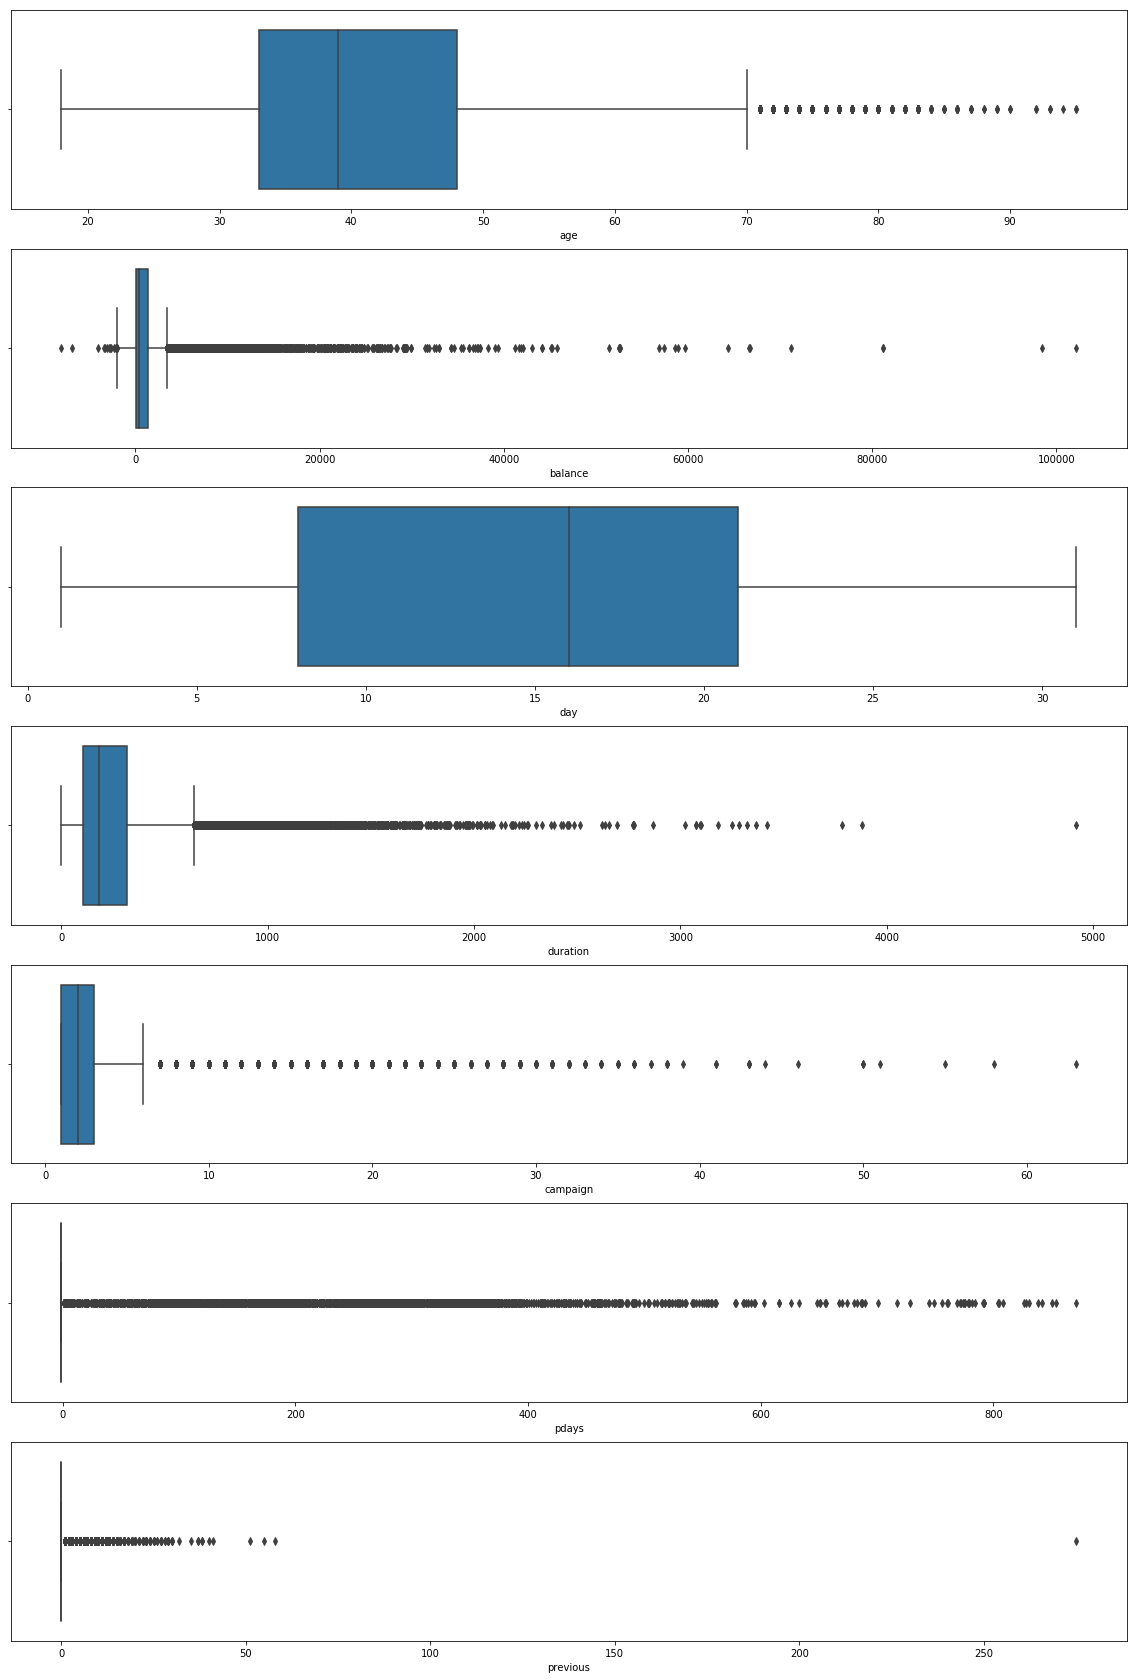

In [ ]:
f, axes = plt.subplots(7,1,figsize=(20, 30), sharex=False)
sns.boxplot(x = "age", data = bankData, ax=axes[0])
sns.boxplot(x = "balance", data = bankData, ax=axes[1])
sns.boxplot(x = "day", data = bankData, ax=axes[2])
sns.boxplot(x = "duration", data = bankData, ax=axes[3])
sns.boxplot(x = "campaign", data = bankData, ax=axes[4])
sns.boxplot(x = "pdays", data = bankData, ax=axes[5])
sns.boxplot(x = "previous", data = bankData, ax=axes[6])

# 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

Boxplot of "previous" shows that all "previous" values (except one) are all below 70. The only value which is greater than 60 is way too large the is > 270. In most likelyhood, it's captured in error. So lets remove this value of 'previous' > 250

In [ ]:
bankData = bankData[bankData.previous < 60]

In [ ]:
bankData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Replace categorical variables with numbers

Print values of categorical variables

In [ ]:
print(bankData.job.value_counts())
print(bankData.marital.value_counts())
print(bankData.education.value_counts())
print(bankData.default.value_counts())
print(bankData.housing.value_counts())
print(bankData.loan.value_counts())
print(bankData.contact.value_counts())
print(bankData.month.value_counts())
print(bankData.poutcome.value_counts())
print(bankData.Target.value_counts())

blue-collar      9732
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27213
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13300
primary       6851
unknown       1857
Name: education, dtype: int64
no     44395
yes      815
Name: default, dtype: int64
yes    25129
no     20081
Name: housing, dtype: int64
no     37966
yes     7244
Name: loan, dtype: int64
cellular     29284
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2648
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1839
success     1511
Name: poutcome, dtype: int64
n

In [ ]:
replaceStruct={"job":{"unknown": -1,"unemployed":0,"student":1, "housemaid":2, "entrepreneur":3,
                     "self-employed":4,"retired":5,"services":6,"admin.":7,"technician":8,
                     "management":9,"blue-collar":10},
               "marital":{"single": 0,"married":1,"divorced":2},
               "education":{"unknown":-1, "primary":1, "secondary":2,"tertiary":3},
               "default":{"no":0,"yes":1},
               "housing":{"no":0,"yes":1},
               "loan":{"no":0,"yes":1},
               "contact":{"unknown":-1,"telephone":0,"cellular":1},
               "month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,
                       "oct":10,"nov":11,"dec":12},
               "poutcome":{"unknown":-1,"failure":0, "success":1,"other":2},
               "Target":{"no":0,"yes":1}
               }
oneHotCols = ["job", "marital", "education", "default","housing","loan","contact","poutcome"]

In [ ]:
bankData = bankData.replace(replaceStruct)

In [ ]:
bankData = pd.get_dummies(bankData, columns=oneHotCols)

In [ ]:
bankData

,age,balance,day,month,duration,campaign,pdays,previous,Target,job_-1,...,housing_1,loan_0,loan_1,contact_-1,contact_0,contact_1,poutcome_-1,poutcome_0,poutcome_1,poutcome_2
0,58,2143,5,5,261,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,44,29,5,5,151,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
2,33,2,5,5,76,1,-1,0,0,0,...,1,0,1,1,0,0,1,0,0,0
3,47,1506,5,5,92,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
4,33,1,5,5,198,1,-1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
5,35,231,5,5,139,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
6,28,447,5,5,217,1,-1,0,0,0,...,1,0,1,1,0,0,1,0,0,0
7,42,2,5,5,380,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
8,58,121,5,5,50,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
9,43,593,5,5,55,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0


Lets split the data into attributes and target variables

In [ ]:
X = bankData.drop('Target',axis=1)

In [ ]:
X

,age,balance,day,month,duration,campaign,pdays,previous,job_-1,job_0,...,housing_1,loan_0,loan_1,contact_-1,contact_0,contact_1,poutcome_-1,poutcome_0,poutcome_1,poutcome_2
0,58,2143,5,5,261,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,44,29,5,5,151,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
2,33,2,5,5,76,1,-1,0,0,0,...,1,0,1,1,0,0,1,0,0,0
3,47,1506,5,5,92,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
4,33,1,5,5,198,1,-1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
5,35,231,5,5,139,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
6,28,447,5,5,217,1,-1,0,0,0,...,1,0,1,1,0,0,1,0,0,0
7,42,2,5,5,380,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
8,58,121,5,5,50,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0
9,43,593,5,5,55,1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0


In [ ]:
y = bankData.pop("Target")

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

Next, lets split them in train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1)

# 5. Train a few standard classification algorithms, note and comment on their performances along different metrics.

We will try below classifiers:
    
    a. Decision Tree
    b. Logistic Regression
    c. Naïve Bayes
    d. K-Nearest Neighbours

### a. DecisionTreeClassifier

In [ ]:
dtcl = DecisionTreeClassifier(criterion='gini', random_state=101, max_depth=3)
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

#### Visualizing the Decision Tree:

In [ ]:
train_char_label = ["no", "yes"]
btdTree_File = open('btd_tree.dot', 'w')
dot_data = tree.export_graphviz(dtcl, out_file=btdTree_File, feature_names=list(X_train), 
                                class_names=list(train_char_label))
btdTree_File.close()

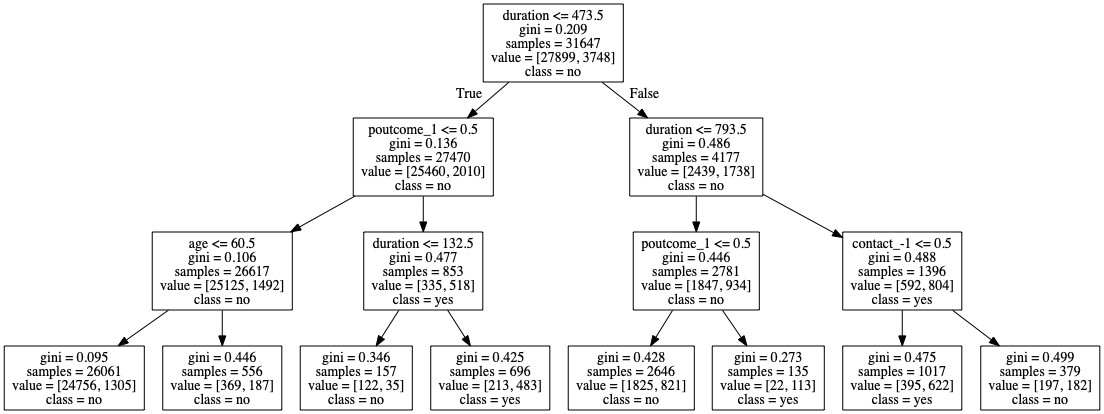

In [ ]:
retCode = system("dot -Tpng btd_tree.dot -o btd_tree.png")
if (retCode>0):
    print("System command returning error: "+str(retCode))
else:
    display(Image("btd_tree.png"))

In [ ]:
dtcl_score=dtcl.score(X_test, y_test)
print(dtcl_score)

0.9037823490378235


In [ ]:
y_predict_dt = dtcl.predict(X_test)
cmdtcl = metrics.confusion_matrix(y_test, y_predict_dt, labels=[0,1])
dtcl_cm = pd.DataFrame(cmdtcl, index=[i for i in ['No', 'Yes']],
                    columns=[i for i in ['No', 'Yes']])
dtcl_cm

,No,Yes
No,11746,276
Yes,1029,512


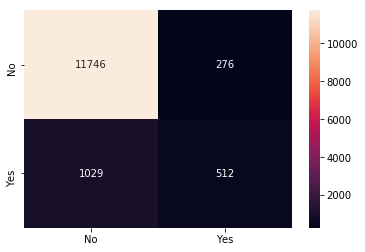

In [ ]:
sns.heatmap(dtcl_cm, annot=True, fmt='g')

### b. Logistic Regression

In [ ]:
lrcl = LogisticRegression(solver='newton-cg', max_iter=100)
lrcl.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

0.9017916390179164
        No  Yes
No   11731  291
Yes   1041  500


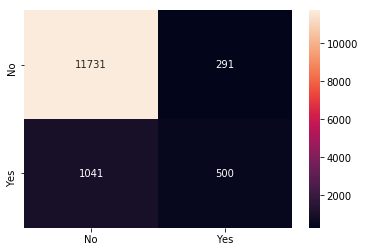

In [ ]:
y_predict_lr = lrcl.predict(X_test)
lrcl_score = lrcl.score(X_test, y_test)
print(lrcl_score)

cm = metrics.confusion_matrix(y_test, y_predict_lr, labels=[0,1])
lrcl_cm = pd.DataFrame(cm, index=[i for i in ['No', 'Yes']],
                     columns=[i for i in ['No', 'Yes']])
print(lrcl_cm)
sns.heatmap(lrcl_cm, annot=True, fmt='g')

### c. Naïve Bayes

In [ ]:
nbcl = GaussianNB()
nbcl.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

0.8203937182039371
        No   Yes
No   10264  1758
Yes    678   863


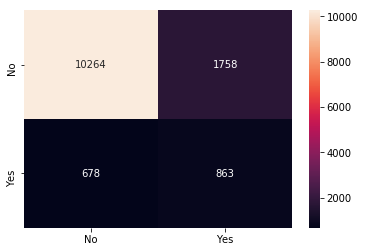

In [ ]:
y_predict_nb = nbcl.predict(X_test)
nbcl_score = nbcl.score(X_test, y_test)
print(nbcl_score)

cm = metrics.confusion_matrix(y_test, y_predict_nb, labels=[0,1])
nbcl_cm = pd.DataFrame(cm, index=[i for i in ['No', 'Yes']],
                     columns=[i for i in ['No', 'Yes']])
print(nbcl_cm)
sns.heatmap(nbcl_cm, annot=True, fmt='g')

### d. K-Nearest Neighbours

In [ ]:
knncl = KNeighborsClassifier(n_neighbors=10)
knncl.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

0.8876354788763547
        No  Yes
No   11751  271
Yes   1253  288


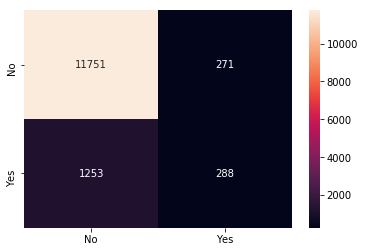

In [ ]:
y_predict_knn = knncl.predict(X_test)
knncl_score = knncl.score(X_test, y_test)
print(knncl_score)

cm = metrics.confusion_matrix(y_test, y_predict_knn, labels=[0,1])
knncl_cm = pd.DataFrame(cm, index=[i for i in ['No', 'Yes']],
                     columns=[i for i in ['No', 'Yes']])
print(knncl_cm)
sns.heatmap(knncl_cm, annot=True, fmt='g')

# 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

List of models created so far:
    
    a. Decision Tree
    b. Logistic Regression
    c. Naïve Bayes
    d. K-Nearest Neighbours
    
    ** Note: comparision of the Enseble Models with their base models will be done in this section itself.

### Ensemble models using Bagging 

#### e. Ensemble model using Bagging and base estimator as Decision Tree

In [ ]:
bgcl1 = BaggingClassifier(base_estimator=dtcl, n_estimators=100, random_state=101)
bgcl1.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=101,
    

In [ ]:
y_predict_bg1 = bgcl1.predict(X_test)
bgcl1_score = bgcl1.score(X_test, y_test)
print("Enseble model's score: ",bgcl1_score)
print("\nBase model Decision Tree's score: ", dtcl_score)

Enseble model's score:  0.9038560790385608

Base model Decision Tree's score:  0.9037823490378235


In [ ]:
cm_bg = metrics.confusion_matrix(y_test, y_predict_bg1, labels=[0,1])
bgcl1_cm = pd.DataFrame(cm_bg, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nEnseble model's Confusion matrix:\n",bgcl1_cm)
print("\nBase Model Decision Tree's Confusion matrix:\n",dtcl_cm)


Enseble model's Confusion matrix:
         No  Yes
No   11708  314
Yes    990  551

Base Model Decision Tree's Confusion matrix:
         No  Yes
No   11746  276
Yes   1029  512


#### f. Ensemble model using Bagging and base estimator as Logistic Regression

In [ ]:
bgcl2 = BaggingClassifier(base_estimator=lrcl, n_estimators=20, random_state=102)
bgcl2.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='newton-cg',
                                                    tol=0.0001, verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=1

In [ ]:
y_predict_bg2 = bgcl2.predict(X_test)
bgcl2_score = bgcl2.score(X_test, y_test)
print("\nEnsemble Model's score: ", bgcl2_score)
print("\nBase model Logistic Regression's score: ", lrcl_score)


Ensemble Model's score:  0.9020128290201282

Base model Logistic Regression's score:  0.9017916390179164


In [ ]:
cm_bg = metrics.confusion_matrix(y_test, y_predict_bg2, labels=[0,1])
bgcl2_cm = pd.DataFrame(cm_bg, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nEnsemble model's Confusion matrix:\n",bgcl2_cm)
print("\nBase model Logistic Regression's Confusion matrix:\n",lrcl_cm)


Ensemble model's Confusion matrix:
         No  Yes
No   11735  287
Yes   1042  499

Base model Logistic Regression's Confusion matrix:
         No  Yes
No   11731  291
Yes   1041  500


#### g. Ensemble model using Bagging and base estimator as Naïve Bayes

In [ ]:
bgcl3 = BaggingClassifier(base_estimator=nbcl, n_estimators=100, random_state=103)
bgcl3.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=103, verbose=0,
                  warm_start=False)

In [ ]:
y_predict_bg3 = bgcl3.predict(X_test)
bgcl3_score = bgcl3.score(X_test, y_test)
print("\nEnsemble Model's score: ", bgcl3_score)
print("\nBase Model Naïve Bayes's score: ", nbcl_score)


Ensemble Model's score:  0.8215733982157339

Base Model Naïve Bayes's score:  0.8203937182039371


In [ ]:
cm_bg = metrics.confusion_matrix(y_test, y_predict_bg3, labels=[0,1])
bgcl3_cm = pd.DataFrame(cm_bg, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nEnsemble model's Confusion matrix:\n",bgcl3_cm)
print("\nBase model Naïve Bayes's Confusion matrix:\n",nbcl_cm)


Ensemble model's Confusion matrix:
         No   Yes
No   10279  1743
Yes    677   864

Base model Naïve Bayes's Confusion matrix:
         No   Yes
No   10264  1758
Yes    678   863


#### h. Ensemble models using Bagging and base estimator as K-Nearest Neighbours

In [ ]:
bgcl4 = BaggingClassifier(base_estimator=knncl, n_estimators=100, random_state=104)
bgcl4.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=10, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=104, verbose=0,
                  warm_start=False)

In [ ]:
y_predict_bg4 = bgcl4.predict(X_test)
bgcl4_score = bgcl4.score(X_test, y_test)
print("\nEnsemble Model's score: ", bgcl4_score)
print("\nBase Model K-Nearest Neighbours's score: ", knncl_score)


Ensemble Model's score:  0.8887414288874143

Base Model K-Nearest Neighbours's score:  0.8876354788763547


In [ ]:
cm_bg = metrics.confusion_matrix(y_test, y_predict_bg4, labels=[0,1])
bgcl4_cm = pd.DataFrame(cm_bg, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nEnsemble model's Confusion matrix:\n",bgcl4_cm)
print("\nBase model K-Nearest Neighbours's Confusion matrix:\n",knncl_cm)


Ensemble model's Confusion matrix:
         No  Yes
No   11679  343
Yes   1166  375

Base model K-Nearest Neighbours's Confusion matrix:
         No  Yes
No   11751  271
Yes   1253  288


### II. Ensemble models using AdaBoosting

#### i. Ensemble model using AdaBoosting and base estimator as Decision Tree

In [ ]:
abcl1 = AdaBoostClassifier(base_estimator=dtcl, n_estimators=50, random_state=105)
abcl1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
y_predict_ab1 = abcl1.predict(X_test)
abcl1_score = abcl1.score(X_test, y_test)
print("\nEnsemble Model's score: ", abcl1_score)
print("\nBase Model Decision Tree's score: ", dtcl_score)


Ensemble Model's score:  0.9038560790385608

Base Model Decision Tree's score:  0.9037823490378235


In [ ]:
cm_ab = metrics.confusion_matrix(y_test, y_predict_ab1, labels=[0,1])
abcl1_cm = pd.DataFrame(cm_ab, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nEnsemble Model's Confusion Matrix:\n",abcl1_cm)
print("\nBase model Decision Tree's Confusion matrix:\n",dtcl_cm)


Ensemble Model's Confusion Matrix:
         No  Yes
No   11562  460
Yes    844  697

Base model Decision Tree's Confusion matrix:
         No  Yes
No   11746  276
Yes   1029  512


#### j. Ensemble model using AdaBoosting and base estimator as Logistic Regression

In [ ]:
abcl2 = AdaBoostClassifier(base_estimator=lrcl, n_estimators=100, random_state=106)
abcl2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='newton-cg',
                                                     tol=0.0001, verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=100, random_state=106)

In [ ]:
y_predict_ab2 = abcl2.predict(X_test)
abcl2_score = abcl2.score(X_test, y_test)
print("\nEnsemble Model's score: ", abcl2_score)
print("\nBase Model Logistic Regression's score:", lrcl_score)


Ensemble Model's score:  0.8994322789943228

Base Model Logistic Regression's score: 0.9017916390179164


In [ ]:
cm_ab = metrics.confusion_matrix(y_test, y_predict_ab2, labels=[0,1])
abcl2_cm = pd.DataFrame(cm_ab, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nEnsemble Model's Confusion Matrix:\n",abcl2_cm)
print("\nBase model Logistic Regression's Confusion matrix:\n",lrcl_cm)


Ensemble Model's Confusion Matrix:
         No  Yes
No   11847  175
Yes   1189  352

Base model Logistic Regression's Confusion matrix:
         No  Yes
No   11731  291
Yes   1041  500


#### k. Ensemble model using AdaBoosting and base estimator as Naïve Bayes

In [ ]:
abcl3 = AdaBoostClassifier(base_estimator=nbcl, n_estimators=100, random_state=107)
abcl3.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   learning_rate=1.0, n_estimators=100, random_state=107)

In [ ]:
y_predict_ab3 = abcl3.predict(X_test)
abcl3_score = abcl3.score(X_test, y_test)
print("\nEnsemble Model's score: ", abcl3_score)
print("\nBase Model Naïve Bayes's score: ", nbcl_score)


Ensemble Model's score:  0.6596623165966231

Base Model Naïve Bayes's score:  0.8203937182039371


In [ ]:
cm_ab = metrics.confusion_matrix(y_test, y_predict_ab3, labels=[0,1])
abcl3_cm = pd.DataFrame(cm_ab, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nEnsemble Model's Confusion Matrix:\n",abcl3_cm)
print("\nBase model Naïve Bayes's Confusion matrix:\n",nbcl_cm)


Ensemble Model's Confusion Matrix:
        No   Yes
No   8034  3988
Yes   628   913

Base model Naïve Bayes's Confusion matrix:
         No   Yes
No   10264  1758
Yes    678   863


#### Ensemble models using AdaBoosting and base estimator as K-Nearest Neighbours

KNeighborsClassifier doesn't support sample_weight.

#### l. First Bagging and then AdaBoosting:

In [ ]:
abcl4 = AdaBoostClassifier(base_estimator=bgcl1, n_estimators=100, random_state=107)
abcl4.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                          class_weight=None,
                                                                                          criterion='gini',
                                                                                          max_depth=3,
                                                                                          max_features=None,
                                                                                          max_leaf_nodes=None,
                                                                                          min_impurity_decrease=0.0,
                                                                                          min_impurity_split=None,
                                                                                   

In [ ]:
y_predict_ab4 = abcl4.predict(X_test)
abcl4_score = abcl4.score(X_test, y_test)
print("\nEnsemble Model's score: ", abcl4_score)
print("\nBase Model Decision Tree's score: ", dtcl_score)


Ensemble Model's score:  0.9092383690923836

Base Model Decision Tree's score:  0.9037823490378235


In [ ]:
cm_ab = metrics.confusion_matrix(y_test, y_predict_ab4, labels=[0,1])
abcl4_cm = pd.DataFrame(cm_ab, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nEnsemble Model's Confusion Matrix:\n",abcl4_cm)
print("\nBase model Decision Tree's Confusion matrix:\n",dtcl_cm)


Ensemble Model's Confusion Matrix:
         No  Yes
No   11597  425
Yes    806  735

Base model Decision Tree's Confusion matrix:
         No  Yes
No   11746  276
Yes   1029  512


### m. Gradient Boosting

In [ ]:
gbcl = GradientBoostingClassifier( learning_rate=0.1, n_estimators=100, random_state=3)
gbcl = gbcl.fit(X_train, y_train)
gbcl_score = gbcl.score(X_test, y_test)
print("Gradient Boosting's score:", gbcl_score)

Gradient Boosting's score: 0.9092383690923836


In [ ]:
y_predict_gb = gbcl.predict(X_test)
cm_gb = metrics.confusion_matrix(y_test, y_predict_gb, labels=[0,1])
gbcl_cm = pd.DataFrame(cm_gb, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nGradient Boosting's Confusion Matrix:\n",gbcl_cm)


Gradient Boosting's Confusion Matrix:
         No  Yes
No   11677  345
Yes    886  655


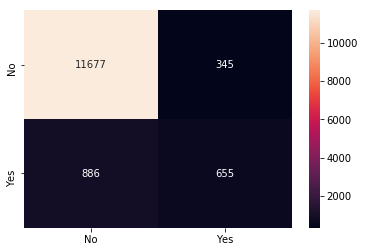

In [ ]:
sns.heatmap(gbcl_cm, annot=True, fmt='g')

### n. Random Forest

In [ ]:
rfcl = RandomForestClassifier(n_estimators=100, random_state=4, max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:
rfcl_score=rfcl.score(X_test, y_test)
print("Random Forest's score: ",rfcl_score)

Random Forest's score:  0.9079112290791123


In [ ]:
y_predict_rf = rfcl.predict(X_test)
cm_rf = metrics.confusion_matrix(y_test, y_predict_rf, labels=[0,1])
rfcl_cm = pd.DataFrame(cm_rf, index=[i for i in ['No','Yes']], columns=[i for i in ['No', 'Yes']])
print("\nRandom Forest's Confusion Matrix:\n",rfcl_cm)


Random Forest's Confusion Matrix:
         No  Yes
No   11617  405
Yes    844  697


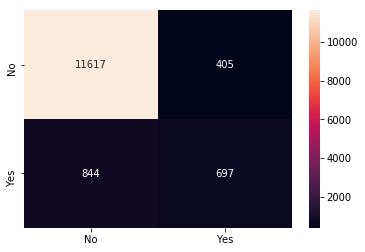

In [ ]:
sns.heatmap(rfcl_cm, annot=True, fmt='g')

# 7. Compare performances of all the models

Lets look at the scores of various models we have seen so far.

In [ ]:
# Base Estimators
print("a. Decision Tree's score: ", dtcl_score)
print("b. Logistic Regression's score: ", lrcl_score)
print("c. Naïve Bayes's score: ", nbcl_score)
print("d. K-Nearest Neighbours's score: ", knncl_score)
# Ensemble models using Bagging
print("e. Ensemble model using Bagging and base estimator as Decision Tree's score: ", bgcl1_score)
print("f. Ensemble model using Bagging and base estimator as Logistic Regression's score: ", bgcl2_score)
print("g. Ensemble model using Bagging and base estimator as Naïve Bayes's score: ", bgcl3_score)
print("h. Ensemble model using Bagging and base estimator as K-Nearest Neighbours's score: ", bgcl4_score)
# Ensemble model using AdaBoosting
print("i. Ensemble model using AdaBoosting and base estimator as Decision Tree's score: ", abcl1_score)
print("j. Ensemble model using AdaBoosting and base estimator as Logistic Regression's score: ", abcl2_score)
print("k. Ensemble model using AdaBoosting and base estimator as Naïve Bayes's score: ", abcl3_score)
# Ensemble model using Bagging > AdaBoosting
print("l. Ensemble model using Bagging > AdaBoosting and base estimator as Decision Tree's score: ", abcl4_score)
# Gradient Boosting
print("m. Gradient Boosting's score: ", gbcl_score)
# andom Forest
print("n. Random Forest's score: ", rfcl_score)

a. Decision Tree's score:  0.9037823490378235
b. Logistic Regression's score:  0.9017916390179164
c. Naïve Bayes's score:  0.8203937182039371
d. K-Nearest Neighbours's score:  0.8876354788763547
e. Ensemble model using Bagging and base estimator as Decision Tree's score:  0.9038560790385608
f. Ensemble model using Bagging and base estimator as Logistic Regression's score:  0.9020128290201282
g. Ensemble model using Bagging and base estimator as Naïve Bayes's score:  0.8215733982157339
h. Ensemble model using Bagging and base estimator as K-Nearest Neighbours's score:  0.8887414288874143
i. Ensemble model using AdaBoosting and base estimator as Decision Tree's score:  0.9038560790385608
j. Ensemble model using AdaBoosting and base estimator as Logistic Regression's score:  0.8994322789943228
k. Ensemble model using AdaBoosting and base estimator as Naïve Bayes's score:  0.6596623165966231
l. Ensemble model using Bagging > AdaBoosting and base estimator as Decision Tree's score:  0.90923

** Going by score, "Ensemble model using Bagging > AdaBoosting and base estimator as Decision Tree" and
"Gradient Boosting" hvae highest score = 0.9092383690923836

Lets look at the confusion matrices of various models we have seen so far.

In [ ]:
# Base Estimators
print("a. Decision Tree:\n ")
print('Confusion Matrix :\n',dtcl_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_dt))
print('\nReport : \n', classification_report(y_test, y_predict_dt))

print("\nb. Logistic Regression's cm:\n ")
print('Confusion Matrix :\n',lrcl_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_lr))
print('\nReport : \n', classification_report(y_test, y_predict_lr))

print("\nc. Naïve Bayes's cm:\n ")
print('Confusion Matrix :\n',nbcl_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_nb))
print('\nReport : ', classification_report(y_test, y_predict_nb))

print("\nd. K-Nearest Neighbours's cm:\n ")
print('Confusion Matrix :\n',knncl_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_knn))
print('\nReport : \n', classification_report(y_test, y_predict_knn))

a. Decision Tree:
 
Confusion Matrix :
         No  Yes
No   11746  276
Yes   1029  512

Accuracy Score :  0.9037823490378235

Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12022
           1       0.65      0.33      0.44      1541

    accuracy                           0.90     13563
   macro avg       0.78      0.65      0.69     13563
weighted avg       0.89      0.90      0.89     13563


b. Logistic Regression's cm:
 
Confusion Matrix :
         No  Yes
No   11731  291
Yes   1041  500

Accuracy Score :  0.9017916390179164

Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12022
           1       0.63      0.32      0.43      1541

    accuracy                           0.90     13563
   macro avg       0.78      0.65      0.69     13563
weighted avg       0.89      0.90      0.89     13563


c. Naïve Bayes's cm:
 
Confusion Matrix :
         No   Y

In [ ]:
# Ensemble models using Bagging
print("\ne. Ensemble model using Bagging and base estimator as Decision Tree's cm:\n ")
print('Confusion Matrix :\n',bgcl1_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_bg1))
print('\nReport : \n', classification_report(y_test, y_predict_bg1))

print("\nf. Ensemble model using Bagging and base estimator as Logistic Regression's cm:\n ")
print('Confusion Matrix :\n',bgcl2_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_bg2))
print('\nReport : \n', classification_report(y_test, y_predict_bg2))

print("\ng. Ensemble model using Bagging and base estimator as Naïve Bayes's cm:\n ")
print('Confusion Matrix :\n',bgcl3_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_bg3))
print('\nReport : \n', classification_report(y_test, y_predict_bg3))

print("\nh. Ensemble model using Bagging and base estimator as K-Nearest Neighbours's cm:\n ")
print('Confusion Matrix :\n',bgcl4_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_bg4))
print('\nReport : \n', classification_report(y_test, y_predict_bg4))


e. Ensemble model using Bagging and base estimator as Decision Tree's cm:
 
Confusion Matrix :
         No  Yes
No   11708  314
Yes    990  551

Accuracy Score :  0.9038560790385608

Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12022
           1       0.64      0.36      0.46      1541

    accuracy                           0.90     13563
   macro avg       0.78      0.67      0.70     13563
weighted avg       0.89      0.90      0.89     13563


f. Ensemble model using Bagging and base estimator as Logistic Regression's cm:
 
Confusion Matrix :
         No  Yes
No   11735  287
Yes   1042  499

Accuracy Score :  0.9020128290201282

Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12022
           1       0.63      0.32      0.43      1541

    accuracy                           0.90     13563
   macro avg       0.78      0.65      0.69     13563
weigh

In [ ]:
# Ensemble models using AdaBoosting
print("\ni. Ensemble model using AdaBoosting and base estimator as Decision Tree's cm:\n ")
print('Confusion Matrix :\n',abcl1_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_ab1))
print('\nReport : \n', classification_report(y_test, y_predict_ab1))

print("\nj. Ensemble model using AdaBoosting and base estimator as Logistic Regression's cm:\n ")
print('Confusion Matrix :\n',abcl2_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_ab2))
print('\nReport : \n', classification_report(y_test, y_predict_ab2))

print("\nk. Ensemble model using AdaBoosting and base estimator as Naïve Bayes's cm:\n ")
print('Confusion Matrix :\n',abcl3_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_ab3))
print('\nReport : \n', classification_report(y_test, y_predict_ab3))


i. Ensemble model using AdaBoosting and base estimator as Decision Tree's cm:
 
Confusion Matrix :
         No  Yes
No   11562  460
Yes    844  697

Accuracy Score :  0.9038560790385608

Report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     12022
           1       0.60      0.45      0.52      1541

    accuracy                           0.90     13563
   macro avg       0.77      0.71      0.73     13563
weighted avg       0.89      0.90      0.90     13563


j. Ensemble model using AdaBoosting and base estimator as Logistic Regression's cm:
 
Confusion Matrix :
         No  Yes
No   11847  175
Yes   1189  352

Accuracy Score :  0.8994322789943228

Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     12022
           1       0.67      0.23      0.34      1541

    accuracy                           0.90     13563
   macro avg       0.79      0.61      0.64     135

In [ ]:
# Ensemble model using Bagging > AdaBoosting
print("\nl. Ensemble model using Bagging > AdaBoosting and base estimator as Decision Tree's score:\n")
print('Confusion Matrix :\n',abcl4_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_ab4))
print('\nReport : \n', classification_report(y_test, y_predict_ab4))

# Gradient Boosting
print("\nm. Gradient Boosting's cm:\n ")
print('Confusion Matrix :\n',gbcl_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_gb))
print('\nReport : \n', classification_report(y_test, y_predict_gb))

# andom Forest
print("\nn. Random Forest's cm:\n ")
print('Confusion Matrix :\n',dtcl_cm)
print('\nAccuracy Score : ', accuracy_score(y_test, y_predict_rf))
print('\nReport : \n', classification_report(y_test, y_predict_rf))


l. Ensemble model using Bagging > AdaBoosting and base estimator as Decision Tree's score:

Confusion Matrix :
         No  Yes
No   11597  425
Yes    806  735

Accuracy Score :  0.9092383690923836

Report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     12022
           1       0.63      0.48      0.54      1541

    accuracy                           0.91     13563
   macro avg       0.78      0.72      0.75     13563
weighted avg       0.90      0.91      0.90     13563


m. Gradient Boosting's cm:
 
Confusion Matrix :
         No  Yes
No   11677  345
Yes    886  655

Accuracy Score :  0.9092383690923836

Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12022
           1       0.66      0.43      0.52      1541

    accuracy                           0.91     13563
   macro avg       0.79      0.70      0.73     13563
weighted avg       0.90      0.91      0.9

** Going by various performance matrix, "Ensemble model using Bagging > AdaBoosting and base estimator as Decision Tree", "Gradient Boosting" and "Random Forest" have highest precision weighted avg = 0.90,
recall = 0.91 and f1-score=0.90. 